In [1]:
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug  5 2024 06:09:47

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



In [2]:
nest.help()

PyNEST - Python interface for the NEST Simulator

* ``nest.helpdesk()`` opens the NEST documentation in your browser.

* ``nest.__version__`` displays the NEST version.

* ``nest.node_models`` shows all available neuron and device models.

* ``nest.synapse_models`` shows all available synapse models.

* To get details on the model equations and parameters,
  please check out our model documentation at https://nest-simulator.readthedocs.io/en/stable/models/index.html.

* To get help on functions in the ``nest`` package, use Python's
  ``help()`` function or IPython's ``?``, e.g.
     - ``help(nest.Create)``
     - ``nest.Connect?``

For more information visit https://www.nest-simulator.org.



In [3]:
dir(nest)

['Cleanup',
 'CollocatedSynapses',
 'Compartments',
 'Connect',
 'ConnectionRules',
 'CopyModel',
 'Create',
 'CreateMask',
 'CreateParameter',
 'DisableStructuralPlasticity',
 'Disconnect',
 'Displacement',
 'Distance',
 'DumpLayerConnections',
 'DumpLayerNodes',
 'EnableStructuralPlasticity',
 'FindCenterElement',
 'FindNearestElement',
 'GetConnections',
 'GetDefaults',
 'GetKernelStatus',
 'GetLocalNodeCollection',
 'GetLocalVPs',
 'GetNodes',
 'GetPosition',
 'GetSourceNodes',
 'GetSourcePositions',
 'GetStatus',
 'GetTargetNodes',
 'GetTargetPositions',
 'Install',
 'Mask',
 'Models',
 'NESTError',
 'NESTErrors',
 'NESTMappedException',
 'NestModule',
 'NodeCollection',
 'NumProcesses',
 'Parameter',
 'PlotLayer',
 'PlotProbabilityParameter',
 'PlotSources',
 'PlotTargets',
 'Prepare',
 'PrintNodes',
 'Rank',
 'Receptors',
 'ResetKernel',
 'Run',
 'RunManager',
 'SelectNodesByMask',
 'SetAcceptableLatency',
 'SetDefaults',
 'SetKernelStatus',
 'SetMaxBuffered',
 'SetStatus',
 'Si

In [4]:
import matplotlib.pyplot as plt
import nest
neuron = nest.Create("iaf_psc_alpha")

In [5]:
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 50,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [6]:
neuron.get("I_e")
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

In [8]:
neuron.set(I_e=376.0)

In [9]:
neuron.set({"I_e": 376})

In [10]:
neuron.I_e = 376.0
neuron.I_e

376.0

In [11]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [12]:
spikerecorder = nest.Create("spike_recorder")

In [17]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

NESTErrors.IllegalConnection: IllegalConnection in SLI function Connect_g_g_D_D: Creation of connection is not possible because:
Each multimeter can only be connected once to a given node.

In [18]:
# 이미 연결한 multimeter와 neuron을 재연결하지 않습니다.
if not nest.GetConnections(multimeter, neuron):
    nest.Connect(multimeter, neuron)

In [19]:
nest.Simulate(1000.0)


Oct 30 15:38:40 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Oct 30 15:38:40 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 30 15:38:40 SimulationManager::run [Info]: 
    Simulation finished.


In [20]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

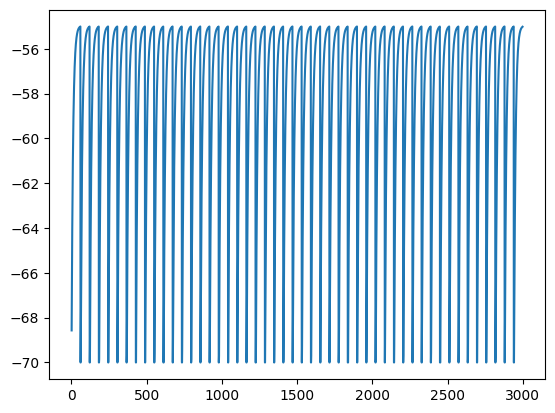

In [21]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(ts, Vms)

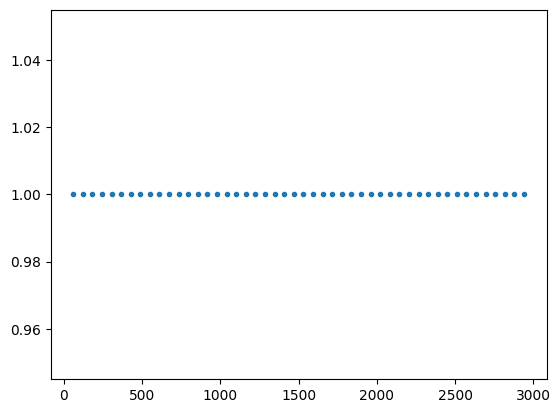

In [22]:
events = spikerecorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()